In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utility.analysis_parameters as ap
from utility import load, load01deg, util

In [5]:
# t = 384
olr, _ = load.get_olr_alb("FV3", "TWP")
# olr = olr[t//16]
iwp = (load.get_iwp("FV3","TWP", ice_only=False)[::12])*1000 #[t]
swu = load.get_swu("FV3","TWP")#[t//16]
swd = load.get_swd("FV3","TWP")#[t//16]
lwp = load.get_lwp("FV3","TWP")[::12]*1000 #[t]*1000



Getting olr and albedo for FV3 TWP:
(320, 342, 341) (304, 342, 341)
... Getting fwp for FV3 in the TWP region ...
returned swu 3 hrly


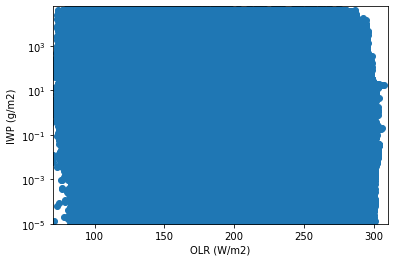

In [3]:
# scatter plot of olr and iwp
plt.scatter(olr.values.flatten(), (iwp.values.flatten()))
plt.xlim([70,310])
plt.ylim([1e-5,6e4])
plt.xlabel("OLR (W/m2)")
plt.ylabel("IWP (g/m2)")
plt.yscale("log")
# plt.savefig(f"../plots/case_study_fv3/histograms/IWPvOLR_t{t//16}_log.png")
# plt.savefig(f"../plots/case_study_fv3/histograms/IWPvOLR_t{t//16}_linear.png")
plt.savefig(f"../plots/case_study_fv3/histograms/IWPvOLR_t_all_log.png")

plt.show()


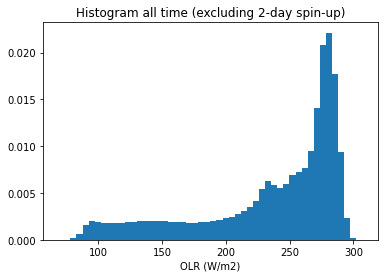

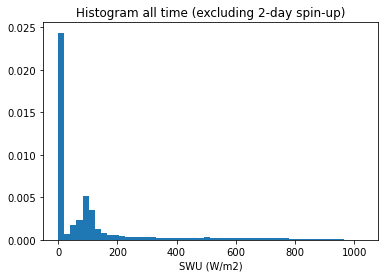

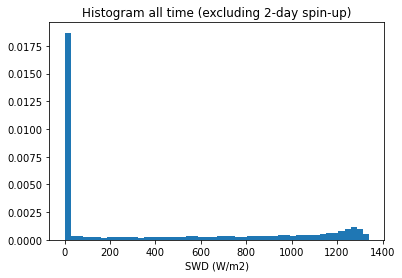

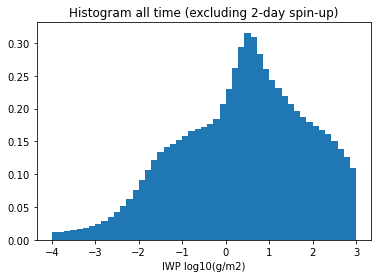

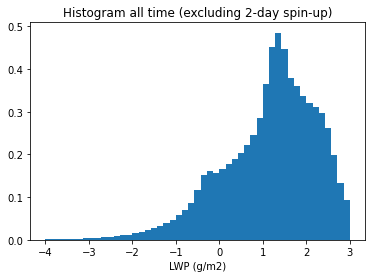

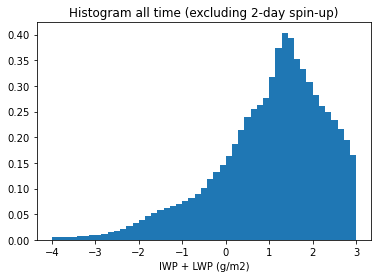

In [8]:
# title_string = f"Histogram on {t//96+2} August 2016 {t%96*0.25} UTC"
title_string = "Histogram all time (excluding 2-day spin-up)"
t0="all"
# t0=t//16
plt.hist(olr.values.flatten(), bins=50, density=1)
plt.xlabel("OLR (W/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/OLR_hist_t{t0}.png")
plt.show()
plt.hist(swu.values.flatten(), bins=50, density=1)
plt.xlabel("SWU (W/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/SWU_hist_t{t0}.png")
plt.show()
plt.hist(swd.values.flatten(), bins=50, density=1)
plt.xlabel("SWD (W/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/SWD_hist_t{t0}.png")
plt.show()
plt.hist(np.log10(iwp.values.flatten()), bins=np.linspace(-4,3,50), density=1)
plt.xlabel("IWP log10(g/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/IWP_hist_t{t0}.png")
plt.show()
plt.hist(np.log10(lwp.values.flatten()), bins=np.linspace(-4,3,50), density=1)
plt.xlabel("LWP (g/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/LWP_hist_t{t0}.png")
plt.show()
plt.hist(np.log10((iwp+lwp).values.flatten()), bins=np.linspace(-4,3,50), density=1)
plt.xlabel("IWP + LWP (g/m2)")
plt.title(title_string)
plt.savefig(f"../plots/case_study_fv3/histograms/IWP+LWP_hist_t{t0}.png")
plt.show()


In [10]:
print(f"means {t0}\n\tOLR {np.min(olr).values}\n\tIWP {np.min(iwp).values}\n\tSWU {np.min(swu).values}\n\tSWD {np.min(swd).values}\n\tLWP {np.min(lwp).values}\n\t(IWP+LWP) {np.min(iwp+lwp).values}")


means all
	OLR 236.47509765625
	IWP 275.7802734375
	SWU 112.56120300292969
	SWD 413.71026611328125
	LWP 92.07524871826172
	(IWP+LWP) 367.8554382324219


In [11]:
print(f"min\n\tOLR {np.min(olr).values}\n\tIWP {np.min(iwp).values}\n\tSWU {np.min(swu).values}\n\tSWD {np.min(swd).values}\n\tLWP {np.min(lwp).values}\n\t(IWP+LWP){np.min(iwp+lwp).values}")

min
	OLR <xarray.DataArray 'flut' ()>
array(68.53616, dtype=float32)
	IWP <xarray.DataArray ()>
array(-2.3828437e-18, dtype=float32)
	SWU <xarray.DataArray 'fsut' ()>
array(0., dtype=float32)
	SWD <xarray.DataArray 'fsdt' ()>
array(0., dtype=float32)
	LWP <xarray.DataArray 'intql' ()>
array(-2.4687234e-18, dtype=float32)
	(IWP+LWP)<xarray.DataArray ()>
array(-3.2332656e-18, dtype=float32)
